## Imports and global vars

In [7]:
import tensorflow as tf
import pandas as pd
import imageio
import skimage
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import random
from sklearn.model_selection import train_test_split

# Set random seed to make results reproducable
np.random.seed(42)

# Global variables
img_folder='bee_imgs'
img_width=100
img_height=100
img_channels=3

## Read Bee data

In [8]:
import os

bees = pd.read_csv('bee_data.csv',
                   index_col=False,
                   parse_dates={'datetime': [1, 2]},
                   dtype={'subspecies': 'category', 'health': 'category', 'caste': 'category'})

def read_or_skip(file):
    """This function is to suppress imageio exception if the file doesn't exist"""
    try:
        img_path = os.path.join(img_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# Apply the read_or_skip function to create the 'img' column
bees['img'] = bees['file'].apply(read_or_skip)

# Check DataFrame information and first few rows
print(bees.info())
print(bees.head())

# Check for null values in the DataFrame
print("Null values in the DataFrame:")
print(bees.isnull().sum())

# Drop rows with null values in the 'img' column
bees.dropna(subset=['img'], inplace=True)

# Print sample data without the 'img' array
print(bees.drop('img', axis=1).head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         5172 non-null   datetime64[ns]
 1   file             5172 non-null   object        
 2   location         5172 non-null   object        
 3   zip code         5172 non-null   int64         
 4   subspecies       5172 non-null   category      
 5   health           5172 non-null   category      
 6   pollen_carrying  5172 non-null   bool          
 7   caste            5172 non-null   category      
 8   img              5172 non-null   object        
dtypes: bool(1), category(3), datetime64[ns](1), int64(1), object(3)
memory usage: 222.9+ KB
None
             datetime         file        location  zip code subspecies  \
0 2018-08-28 16:07:00  041_066.png  Alvin, TX, USA     77511         -1   
1 2018-08-28 16:07:00  041_072.png  Alvin, TX, USA     77511   

## Bee data EDA
### Distribution of bees by categories

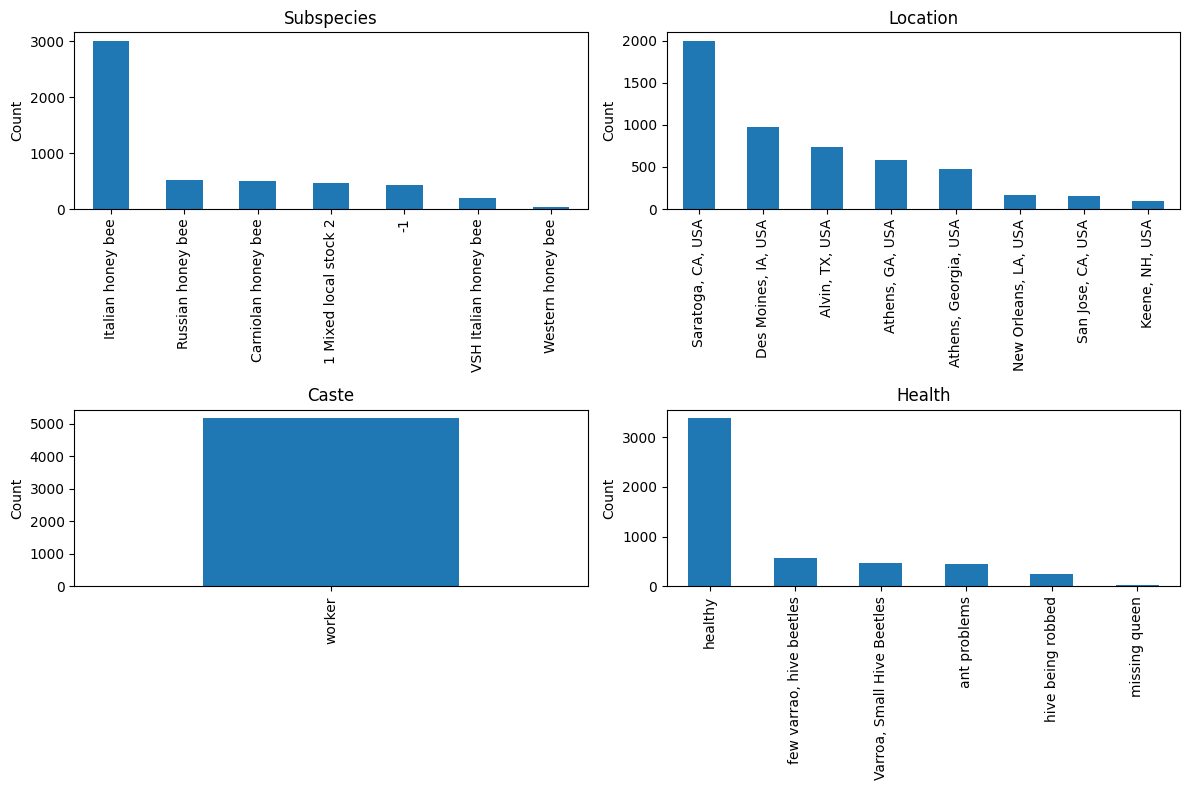

In [9]:
import matplotlib.pyplot as plt

# Create a 2x2 subplot
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot counts of subspecies if the column exists and has non-null values
if 'subspecies' in bees.columns and not bees.subspecies.isnull().all():
    bees.subspecies.value_counts().plot(kind='bar', ax=ax[0, 0])
    ax[0, 0].set_ylabel('Count')
    ax[0, 0].set_title('Subspecies')

# Plot counts of location if the column exists and has non-null values
if 'location' in bees.columns and not bees.location.isnull().all():
    bees.location.value_counts().plot(kind='bar', ax=ax[0, 1])
    ax[0, 1].set_title('Location')
    ax[0, 1].set_ylabel('Count')

# Plot counts of caste if the column exists and has non-null values
if 'caste' in bees.columns and not bees.caste.isnull().all():
    bees.caste.value_counts().plot(kind='bar', ax=ax[1, 0])
    ax[1, 0].set_title('Caste')
    ax[1, 0].set_ylabel('Count')

# Plot counts of health if the column exists and has non-null values
if 'health' in bees.columns and not bees.health.isnull().all():
    bees.health.value_counts().plot(kind='bar', ax=ax[1, 1])
    ax[1, 1].set_title('Health')
    ax[1, 1].set_ylabel('Count')

# Adjust the layout for better spacing
f.subplots_adjust(hspace=0.7)

# Ensure tight layout
f.tight_layout()

# Show the plot
plt.show()

### Look at Bees images

**Subspecies of bees**

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  # This is added back by InteractiveShellApp.init_path()


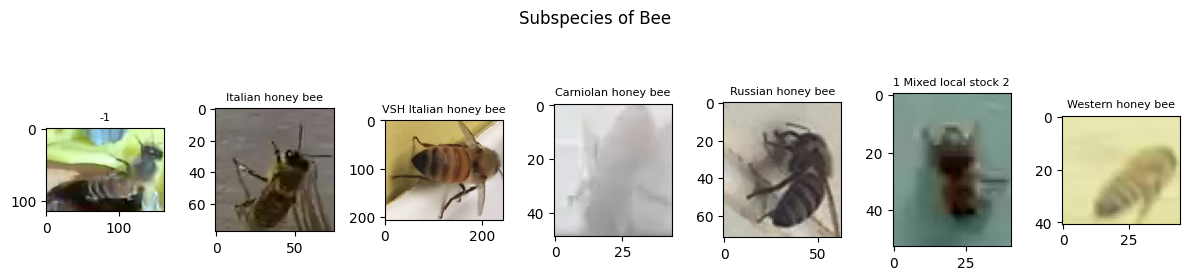

In [10]:
# Update the image loading section
subspecies = bees['subspecies'].unique()[:7]
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 3))
i = 0

# Draw the first found bee of given subspecies
for s in subspecies:
    if s == 'healthy':
        continue
    file = os.path.join(img_folder, bees[bees['subspecies'] == s].iloc[0]['file'])
    im = imageio.imread(file)
    ax[i].imshow(im, resample=True)
    ax[i].set_title(s, fontsize=8)
    i += 1

plt.suptitle("Subspecies of Bee")
plt.tight_layout()
plt.show()

**Healthy bees**

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


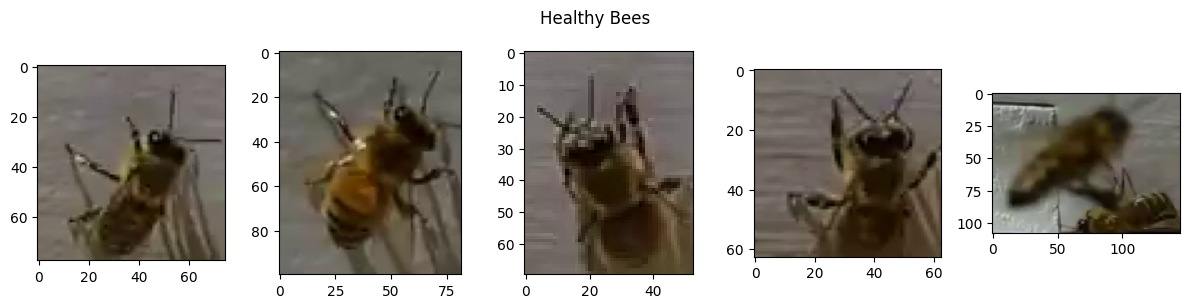

In [11]:
# Display healthy bees
healthy = bees[bees['health'] == 'healthy'].iloc[:5]

f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
# Read image of original size from disk, because bees['img'] contains resized numpy array
for i in range(0, 5):
    file = os.path.join(img_folder, healthy.iloc[i]['file'])
    ax[i].imshow(imageio.imread(file))

plt.suptitle("Healthy Bees")
plt.tight_layout()
plt.show()

**Sick bees**

Checking file path: bee_imgs\038_362.png
Checking file path: bee_imgs\030_204.png
Checking file path: bee_imgs\036_094.png
Checking file path: bee_imgs\041_066.png
Checking file path: bee_imgs\034_032.png


c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


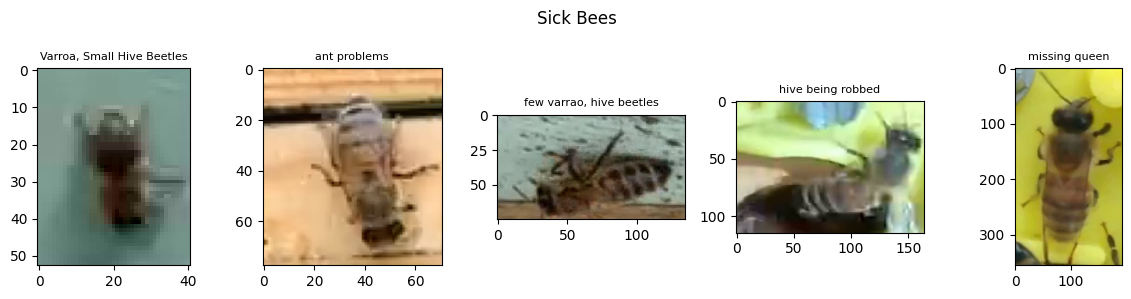

In [13]:
health_cats = bees['health'].cat.categories
f, ax = plt.subplots(1, health_cats.size-1, figsize=(12,3))
i = 0

for c in health_cats:
    if c == 'healthy':
        continue

    bee = bees[bees['health'] == c].iloc[0]
    f = bee['file']
    f_path = os.path.join(img_folder, f)  # Use os.path.join for correct path joining

    print(f"Checking file path: {f_path}")

    if os.path.exists(f_path):
        ax[i].imshow(imageio.imread(f_path))
        ax[i].set_title(bee['health'], fontsize=8)
    else:
        print(f"File not found: {f_path}")

    i += 1

plt.suptitle("Sick Bees")
plt.tight_layout()
plt.show()

## CNN Model for Bee subspecies detection

### Prepare data and train Bee subspecies detection CNN

In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Prepare train and test data
labels = pd.get_dummies(bees.subspecies, drop_first=True)
X = np.stack(bees.img)
train_data, test_data, train_labels, test_labels = train_test_split(X, labels)

# Build and train CNN model
model = Sequential()
model.add(Conv2D(5, kernel_size=3, input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(labels.columns.size, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=10, batch_size=10)

Epoch 1/10
311/311 [==============================] - 10s 29ms/step - loss: 85.5260 - accuracy: 0.5015 - val_loss: 447.3875 - val_accuracy: 0.2796
Epoch 2/10
311/311 [==============================] - 5s 16ms/step - loss: 1423.7709 - accuracy: 0.4573 - val_loss: 1194.6049 - val_accuracy: 0.4536
Epoch 3/10
311/311 [==============================] - 5s 16ms/step - loss: 5554.8457 - accuracy: 0.4599 - val_loss: 13268.0674 - val_accuracy: 0.1985
Epoch 4/10
311/311 [==============================] - 5s 17ms/step - loss: 11755.3867 - accuracy: 0.4795 - val_loss: 13402.7266 - val_accuracy: 0.5683
Epoch 5/10
311/311 [==============================] - 5s 17ms/step - loss: 18695.5117 - accuracy: 0.5024 - val_loss: 19961.5996 - val_accuracy: 0.4446
Epoch 6/10
311/311 [==============================] - 5s 16ms/step - loss: 24713.3066 - accuracy: 0.4857 - val_loss: 39903.7305 - val_accuracy: 0.5425
Epoch 7/10
311/311 [==============================] - 5s 17ms/step - loss: 42180.8867 - accuracy: 0.4

### Evaluate bee subspecies detection model

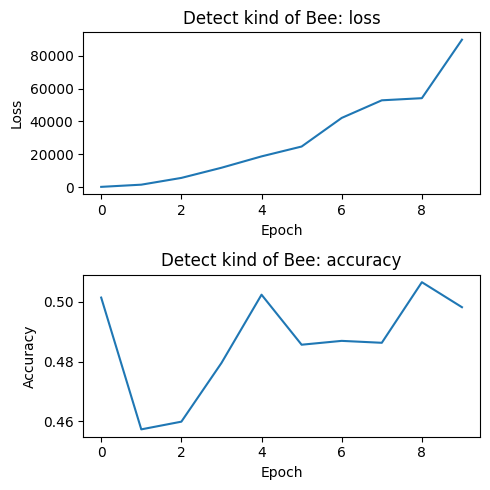

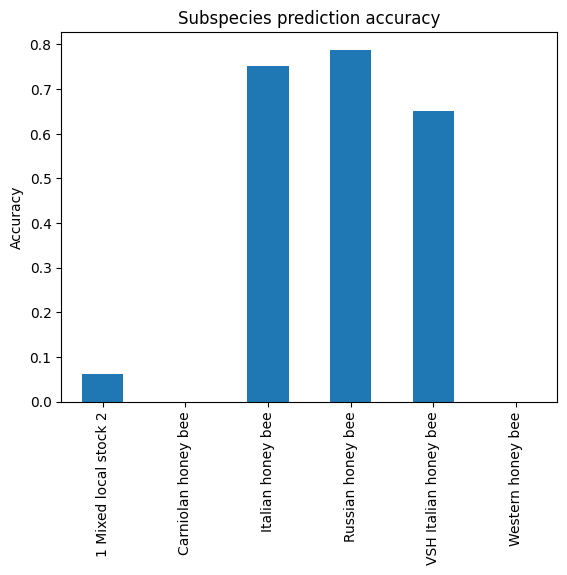

41/41 [==============================] - 0s 11ms/step - loss: 66580.7734 - accuracy: 0.5646
Evaluation: loss function: 66580.7734375, accuracy: 0.5645784735679626


In [15]:
## Trained model analysis and evaluation
f, ax = plt.subplots(2,1, figsize=(5,5))
ax[0].plot(training.history['loss'])
ax[0].set_title('Detect kind of Bee: loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Accuracy
ax[1].plot(training.history['accuracy'])
ax[1].set_title('Detect kind of Bee: accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

# Accuracy by subspecies
test_pred = model.predict(test_data)
acc_by_subspecies = np.logical_and((test_pred > 0.5), test_labels).sum()/test_labels.sum()
acc_by_subspecies.plot(kind='bar', title='Subspecies prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Loss function and accuracy
test_res = model.evaluate(test_data, test_labels)
print('Evaluation: loss function: %s, accuracy:' % test_res[0], test_res[1])

## CNN model for  Bee health detection

### Prepare data and train Bee health detection model

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Prepare train and test data
labels = pd.get_dummies(bees.health)
X = np.stack(bees.img)
train_data, test_data, train_labels, test_labels = train_test_split(X, labels)

# Data augmentation - a little bit rotate, zoom and shift input images.
generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
generator.fit(train_data)

# Split train data to train and validation
train_data, train_data_val, train_labels, train_labels_val = train_test_split(train_data, 
                                                                              train_labels,
                                                                              test_size=0.1)  
# Build and train CNN model
model=Sequential()
model.add(Conv2D(6, kernel_size=3, input_shape=(img_width, img_height,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(12, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(labels.columns.size, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training if no improvement after some epochs
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train
training = model.fit_generator(generator.flow(train_data,train_labels, batch_size=20),
                              epochs = 50,
                              validation_data=(train_data_val, train_labels_val),
                              steps_per_epoch=20,  # batch_size
                              callbacks=[earlystopper])

Epoch 1/50


c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


20/20 [==============================] - 2s 64ms/step - loss: 1.4690 - accuracy: 0.5750 - val_loss: 1.0044 - val_accuracy: 0.6778
Epoch 2/50
20/20 [==============================] - 1s 56ms/step - loss: 1.0564 - accuracy: 0.6825 - val_loss: 0.8707 - val_accuracy: 0.6778
Epoch 3/50
20/20 [==============================] - 1s 57ms/step - loss: 0.9433 - accuracy: 0.6625 - val_loss: 0.8788 - val_accuracy: 0.7294
Epoch 4/50
20/20 [==============================] - 1s 56ms/step - loss: 0.9177 - accuracy: 0.6675 - val_loss: 0.7498 - val_accuracy: 0.7809
Epoch 5/50
20/20 [==============================] - 1s 59ms/step - loss: 0.8977 - accuracy: 0.6975 - val_loss: 0.6101 - val_accuracy: 0.7784
Epoch 6/50
20/20 [==============================] - 1s 56ms/step - loss: 0.8027 - accuracy: 0.7000 - val_loss: 0.5885 - val_accuracy: 0.8015
Epoch 7/50
20/20 [==============================] - 1s 55ms/step - loss: 0.8100 - accuracy: 0.6925 - val_loss: 0.7340 - val_accuracy: 0.7526
Epoch 8/50
20/20 [======

### Evaluate Bee health detection model

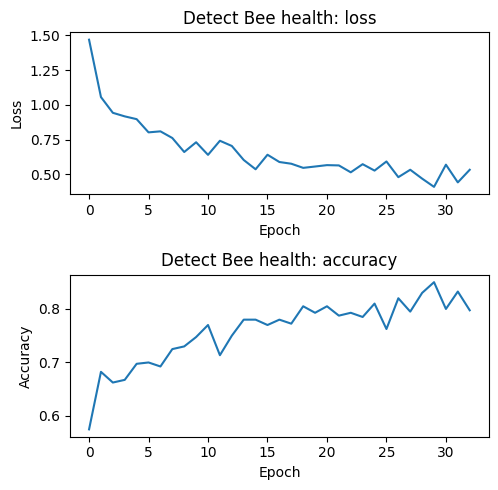

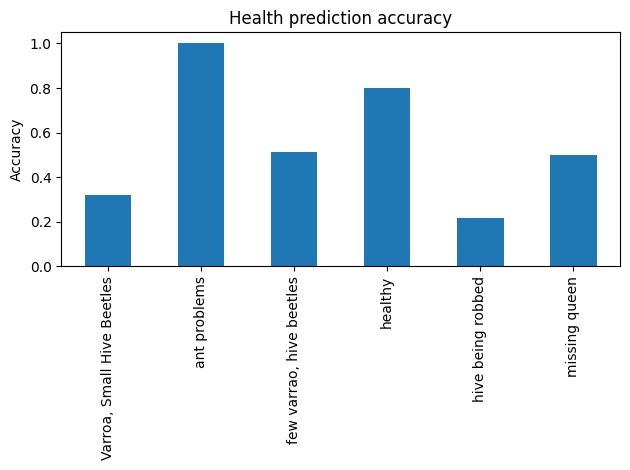

41/41 [==============================] - 1s 12ms/step - loss: 0.7047 - accuracy: 0.7254
Evaluation: loss function: 0.7046820521354675, accuracy: 0.7254446744918823


In [17]:
f, ax = plt.subplots(2,1, figsize=(5,5))

# Loss function
ax[0].plot(training.history['loss'])
ax[0].set_title('Detect Bee health: loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Accuracy
ax[1].plot(training.history['accuracy'])
ax[1].set_title('Detect Bee health: accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

# Prediction accuracy by health status
test_pred = model.predict(test_data)
acc_by_health = np.logical_and((test_pred > 0.5), test_labels).sum()/test_labels.sum()
acc_by_health.plot(kind='bar', title='Health prediction accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

test_res = model.evaluate(test_data, test_labels)
print('Evaluation: loss function: %s, accuracy:' % test_res[0], test_res[1])

## Conclusion
Accuracy of some predicted categories is too low.
Todo: improve the model

In [18]:
import os
import urllib.request
from zipfile import ZipFile

# YOLOv5 GitHub repository URL
repo_url = "https://github.com/ultralytics/yolov5/archive/refs/heads/master.zip"

# Directory to download and extract YOLOv5
yolov5_dir = "yolov5"

# Create the YOLOv5 directory if it doesn't exist
if not os.path.exists(yolov5_dir):
    os.makedirs(yolov5_dir)

# Download the YOLOv5 repository as a zip file
zip_file_path = os.path.join(yolov5_dir, "yolov5.zip")
urllib.request.urlretrieve(repo_url, zip_file_path)

# Extract the contents of the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(yolov5_dir)

# Clean up - remove the zip file
os.remove(zip_file_path)

# Navigate to the yolov5 directory
os.chdir(yolov5_dir)

# Install YOLOv5 dependencies
os.system("pip install -U -r requirements.txt")

# Display the contents of the YOLOv5 directory
print("YOLOv5 directory contents:")
print(os.listdir())

YOLOv5 directory contents:
['yolov5', 'yolov5-master', 'yolov8']


In [1]:
import os
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO("yolov8n.pt")  # load a pretrained YOLOv8n model
# Get the absolute path to the current working directory
current_dir = os.path.abspath(os.getcwd())
# Update the path to data.yaml based on your actual directory structure
data_yaml_path = os.path.join(current_dir, "data.yaml")
# Train the model using data.yaml configuration file
model.train(data=data_yaml_path, imgsz=640)  # Adjust imgsz based on your dataset
# Validate model performance on the validation set
model.val(data=data_yaml_path)
# Test the model on the test set
#model.test(data=data_yaml_path)
# Predict on an image and save the result
model.predict(source="beegroup.jpg", save=True)
# Export the trained model to ONNX format
model.export()

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 6.23M/6.23M [00:01<00:00, 5.53MB/s]
New https://pypi.org/project/ultralytics/8.0.227 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145  Python-3.7.16 torch-1.13.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\ziyan\Desktop\beeyolo\data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fract

'runs\\detect\\train\\weights\\best.torchscript'

In [2]:
# After running model.val(data=data_yaml_path)
results_dir = "runs/detect/val"
print("Detection results saved in:", results_dir)

# List files in the results directory
files = os.listdir(results_dir)
print("Files in results directory:", files)

Detection results saved in: runs/detect/val
Files in results directory: ['confusion_matrix.png', 'confusion_matrix_normalized.png', 'F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png', 'val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'val_batch2_pred.jpg']


In [5]:
import torch
import torch.nn as nn

# Assuming you have a DataLoader and Dataset for CNN training
# from cnn_dataset import CustomDataset

# Load the YOLOv8 ONNX model
# Make sure you have exported the YOLOv8 model to ONNX using torch.onnx.export
# Example export code:
# torch.onnx.export(your_yolov8_model, input_tensor, 'yolov8n.onnx', verbose=True, input_names=['input'], output_names=['output'])
yolov8_model_path = 'runs\\detect\\train\\weights\\best.torchscript'

# Extract YOLOv8 features
yolov8_model = torch.jit.load(yolov8_model_path)
class FeatureExtractor(nn.Module):
    def __init__(self, yolov8_model):
        super(FeatureExtractor, self).__init__()
        self.features = yolov8_model  # Assuming features are the entire model

    def forward(self, x):
        return self.features(x)

# Create the feature extractor
feature_extractor = FeatureExtractor(yolov8_model)

# Create the CNN model with YOLOv8 features
class CustomCNN(nn.Module):
    def __init__(self, feature_extractor, num_classes):
        super(CustomCNN, self).__init__()
        self.features = feature_extractor
        self.fc = nn.Linear(512, num_classes)  # Adjust input size (512) based on the YOLOv8 feature size

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize your CNN model
num_classes = 10  # Change this to the number of classes in your CNN
cnn_model = CustomCNN(feature_extractor, num_classes)

# Continue with training or other tasks

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Assuming you have a DataLoader and Dataset for CNN training
# Modify this according to your actual dataset and DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load the YOLOv8 ONNX model
yolov8_model_path = 'runs\\detect\\train\\weights\\best.torchscript'
yolov8_model = torch.jit.load(yolov8_model_path)

# Extract YOLOv8 features
class FeatureExtractor(nn.Module):
    def __init__(self, yolov8_model):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(*list(yolov8_model.children())[:-1])

    def forward(self, x):
        return self.features(x)

# Create the feature extractor
feature_extractor = FeatureExtractor(yolov8_model)

# Create the CNN model with YOLOv8 features
class CustomCNN(nn.Module):
    def __init__(self, feature_extractor, num_classes):
        super(CustomCNN, self).__init__()
        self.features = feature_extractor
        # Adjust the input size based on the actual size of the features extracted by YOLOv8
        self.fc = nn.Linear(784, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize your CNN model
num_classes = 10  # Change this to the number of classes in your CNN
cnn_model = CustomCNN(feature_extractor, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        yolo_features = feature_extractor(images)
        outputs = cnn_model(yolo_features)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss}")

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

Epoch 1/5, Loss: 0.4707410180651303
Epoch 2/5, Loss: 0.32588338229987923
Epoch 3/5, Loss: 0.3086831732027566
Epoch 4/5, Loss: 0.30021748907848206
Epoch 5/5, Loss: 0.2950914727488179


<Figure size 640x480 with 1 Axes>